In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("../data/train_fe.csv")
test=pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,cryosleep,vip,side,destination_55_cancri_e,destination_pso_j318_5_22,destination_trappist_1e,homeplanet_earth,homeplanet_europa,homeplanet_mars,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.215190,0.000000,0.043105,0.001320,0.000000,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.354430,0.000000,0.000000,0.000000,0.000000,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.253165,0.000000,0.000072,0.012302,0.052552,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.455696,0.000000,0.000000,0.000000,0.000000,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.468354,0.100806,0.000000,0.003405,0.002154,0.0,0.0


In [4]:
test.head()

,cryosleep,vip,side,destination_55_cancri_e,destination_pso_j318_5_22,destination_trappist_1e,homeplanet_earth,homeplanet_europa,homeplanet_mars,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.240506,0.042036,0.012589,0.026988,0.000162,0.043799,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.227848,0.000403,0.032608,0.000000,0.000000,0.000041,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.518987,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.443038,0.000000,0.012192,0.018560,0.000000,0.000000,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.544304,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [5]:
cols = ['age','roomservice', 'spa', 'vrdeck', 'homeplanet_earth', 'homeplanet_europa', 'homeplanet_mars', 'transported']

In [6]:
train=train[cols]

In [7]:
x_train_use, y_train_use= train.drop('transported', axis=1), train['transported']

In [8]:
x_train,x_val, y_train, y_val=train_test_split(x_train_use, y_train_use, train_size=0.8, random_state=42)

In [9]:
x_train.shape

(4837, 7)

### Decision Tree Classifier

#### Max Depth 3

In [10]:
param_grid = {
    'max_depth': list(range(3, 7)),  
    'max_features': list(range(3, 8))  
}


In [11]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)


In [12]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6, 7]})

In [13]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [14]:
best_param

{'max_depth': 6, 'max_features': 3}

In [15]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=3, random_state=42)

In [16]:
y_pred=best_model.predict(x_train)

In [17]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76      2439
         1.0       0.73      0.84      0.79      2398

    accuracy                           0.77      4837
   macro avg       0.78      0.77      0.77      4837
weighted avg       0.78      0.77      0.77      4837



In [18]:
def plot_confusion_matrix(title,conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()
    plt.savefig("../conf/"+title+".png")

In [19]:
conf=confusion_matrix(y_train, y_pred)

<AxesSubplot:>

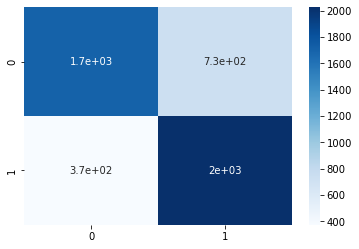

In [20]:
#plot_confusion_matrix("Decision_Tree_Classfier_Train",conf)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [21]:
y_pred_val=best_model.predict(x_val)

In [22]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75       576
         1.0       0.76      0.81      0.79       634

    accuracy                           0.77      1210
   macro avg       0.77      0.77      0.77      1210
weighted avg       0.77      0.77      0.77      1210



In [23]:
conf_val=confusion_matrix(y_val, y_pred_val)

<AxesSubplot:>

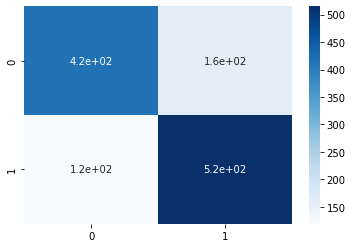

In [24]:
#plot_confusion_matrix("Decision_Tree_Classfier_Validate",conf_val)
sns.heatmap(conf_val, annot=True, cmap= "Blues")

### Extract Result

In [25]:
import time

start=time.time()

best_model.fit(x_train_use, y_train_use)

elapse=time.time()-start

In [26]:
pred_use= best_model.predict(x_train_use)

In [27]:
cross_val_score(best_model, x_train_use, y_train_use, scoring='f1')

array([0.77984496, 0.77333333, 0.77752117, 0.77560594, 0.78246753])

In [28]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78      3015
         1.0       0.76      0.86      0.81      3032

    accuracy                           0.79      6047
   macro avg       0.80      0.79      0.79      6047
weighted avg       0.80      0.79      0.79      6047



In [29]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [30]:
test=test[cols]

In [31]:
x_test, y_test= test.drop('transported', axis=1), test['transported']

In [32]:
pred_test=best_model.predict(x_test)

In [33]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.75       745
         1.0       0.75      0.85      0.80       780

    accuracy                           0.78      1525
   macro avg       0.78      0.78      0.78      1525
weighted avg       0.78      0.78      0.78      1525



In [34]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [35]:
conf_test=confusion_matrix(y_test, pred_test)

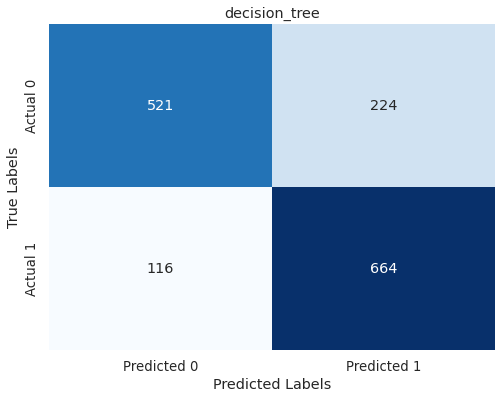

<Figure size 432x288 with 0 Axes>

In [36]:
plot_confusion_matrix("decision_tree",conf_test)

In [37]:
df=pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Decision Tree"
df["elapsed"] = elapse

In [38]:
df.head()

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.796163,0.806242,0.75843,0.747748,0.860488,0.851282,Decision Tree,0.006896


In [39]:
df.to_csv("../results/regular/dtc.csv", index=False)